## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split


In [50]:
flight = pd.read_csv("flights_sorted.csv")

In [51]:
pd.set_option('display.max_columns', None)


In [52]:
variables_to_remove = [  'mkt_carrier_fl_num', 'mkt_carrier_fl_num', 'origin_airport_id',
                         'dest_airport_id', 'wheels_off', 'wheels_on']

In [53]:
flight.drop(variables_to_remove, axis = 1, inplace = True)

In [54]:
# Add total delay column
flight['totel_delay'] = flight['dep_delay'] + (flight['arr_delay'] - flight['dep_delay'])

In [55]:
missing_df = flight.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(flight.shape[0]-missing_df['missing values'])/flight.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)


,variable,missing values,filling factor (%)
0,total_add_gtime,99356,0.644
1,first_dep_time,99356,0.644
2,longest_add_gtime,99356,0.644
3,late_aircraft_delay,81041,18.959
4,security_delay,81041,18.959
5,nas_delay,81041,18.959
6,weather_delay,81041,18.959
7,carrier_delay,81041,18.959
8,totel_delay,1968,98.032
9,air_time,1960,98.040


In [56]:
flight.dtypes

fl_date                 object
mkt_unique_carrier      object
origin                  object
origin_city_name        object
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled                int64
diverted                 int64
crs_elapsed_time         int64
actual_elapsed_time    float64
air_time               float64
flights                  int64
distance                 int64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
first_dep_time         float64
total_add_gtime        float64
longest_add_gtime      float64
totel_delay            float64
dtype: object

In [57]:
flight.drop(['longest_add_gtime','first_dep_time','total_add_gtime'], axis = 1, inplace = True)

In [58]:
flight['late_aircraft_delay'] = flight['late_aircraft_delay'].fillna(0)
flight['security_delay'] = flight['security_delay'].fillna(0)
flight['nas_delay'] = flight['nas_delay'].fillna(0)
flight['carrier_delay'] = flight['carrier_delay'].fillna(0)
flight['weather_delay'] = flight['weather_delay'].fillna(0)

In [59]:
flight.dropna(inplace=True)
flight.head(3)

,fl_date,mkt_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,totel_delay
0,12/31/2019,AA,CLT,"Charlotte, NC",AGS,"Augusta, GA",1125,1117.0,-8.0,27.0,5.0,1227,1219.0,-8.0,0,0,62,62.0,30.0,1,140,0.0,0.0,0.0,0.0,0.0,-8.0
1,12/31/2019,DL,SEA,"Seattle, WA",PHX,"Phoenix, AZ",1859,1858.0,-1.0,23.0,6.0,2244,2242.0,-2.0,0,0,165,164.0,135.0,1,1107,0.0,0.0,0.0,0.0,0.0,-2.0
2,12/31/2019,UA,DEN,"Denver, CO",IAD,"Washington, DC",1340,1334.0,-6.0,14.0,6.0,1848,1829.0,-19.0,0,0,188,175.0,155.0,1,1452,0.0,0.0,0.0,0.0,0.0,-19.0


In [60]:
flight['fl_date'] = pd.to_datetime(flight['fl_date'], format= "%m/%d/%Y" )

In [61]:
flight['month'] = pd.to_datetime(flight['fl_date']).dt.month

In [62]:
flight['day'] = pd.to_datetime(flight['fl_date']).dt.day

In [63]:
flight.head(3)

,fl_date,mkt_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,totel_delay,month,day
0,2019-12-31,AA,CLT,"Charlotte, NC",AGS,"Augusta, GA",1125,1117.0,-8.0,27.0,5.0,1227,1219.0,-8.0,0,0,62,62.0,30.0,1,140,0.0,0.0,0.0,0.0,0.0,-8.0,12,31
1,2019-12-31,DL,SEA,"Seattle, WA",PHX,"Phoenix, AZ",1859,1858.0,-1.0,23.0,6.0,2244,2242.0,-2.0,0,0,165,164.0,135.0,1,1107,0.0,0.0,0.0,0.0,0.0,-2.0,12,31
2,2019-12-31,UA,DEN,"Denver, CO",IAD,"Washington, DC",1340,1334.0,-6.0,14.0,6.0,1848,1829.0,-19.0,0,0,188,175.0,155.0,1,1452,0.0,0.0,0.0,0.0,0.0,-19.0,12,31


In [64]:
flight['dep_time'] = flight['dep_time'].astype(str).str.strip()

In [65]:
#convert dep_time to H:M
flight['dep_time'] = flight['dep_time'].map(str)
flight['dep_time'] = flight['dep_time'].str.zfill(4)
flight.dep_time = flight.dep_time.str[:2] + ':' + flight.dep_time.str[-2:]
flight['dep_time'] = flight['dep_time'].astype(str).replace('\.', '', regex=True)


In [66]:
#convert crs_arr_time to H:M

flight['crs_arr_time'] = flight['crs_arr_time'].map(str)
flight['crs_arr_time'] = flight['crs_arr_time'].str.zfill(4)
flight.crs_arr_time = flight.crs_arr_time.str[:2] + ':' + flight.crs_arr_time.str[-2:]

In [67]:
#convert arr_time to H:M

flight['arr_time'] = flight['arr_time'].map(str)
flight['arr_time'] = flight['arr_time'].str.zfill(4)
flight.arr_time = flight.arr_time.str[:2] + ':' + flight.arr_time .str[-2:]
flight['dep_time'] = flight['dep_time'].astype(str).replace('\.', '', regex=True)


In [68]:
#convert crs_dep_time to H:M

flight['crs_dep_time'] = flight['crs_dep_time'].map(str)
flight['crs_dep_time'] = flight['crs_dep_time'].str.zfill(4)
flight.crs_dep_time = flight.crs_dep_time.str[:2] + ':' + flight.arr_time .str[-2:]
flight['crs_dep_time'] = flight['crs_dep_time'].astype(str).replace('\.', '', regex=True)

#flight['crs_dep_time'] = pd.to_datetime(flight['crs_dep_time']).dt.strftime('%H:%M')

In [69]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97994 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fl_date              97994 non-null  datetime64[ns]
 1   mkt_unique_carrier   97994 non-null  object        
 2   origin               97994 non-null  object        
 3   origin_city_name     97994 non-null  object        
 4   dest                 97994 non-null  object        
 5   dest_city_name       97994 non-null  object        
 6   crs_dep_time         97994 non-null  object        
 7   dep_time             97994 non-null  object        
 8   dep_delay            97994 non-null  float64       
 9   taxi_out             97994 non-null  float64       
 10  taxi_in              97994 non-null  float64       
 11  crs_arr_time         97994 non-null  object        
 12  arr_time             97994 non-null  object        
 13  arr_delay            97994 non-

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [70]:
shapiro(flight['totel_delay'])

C:\Users\info\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.47812747955322266, pvalue=0.0)

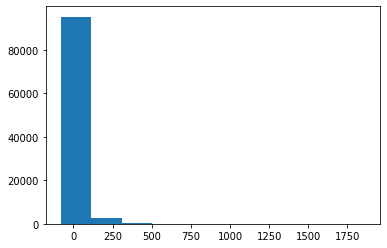

In [71]:
count, bins, ignored = plt.hist(flight['totel_delay'], 10)


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [72]:
flight['N_of_flight_m'] = flight.groupby('month')[['fl_date']].size()
Average_M_delay = flight.groupby('month').agg({'totel_delay': 'mean', 'N_of_flight_m': 'size',  'origin': 'nunique'})
Average_M_delay

,totel_delay,N_of_flight_m,origin
month,,,
1,3.716658,7528,292
2,7.273545,7114,290
3,2.637220,8490,310
4,4.021888,8178,308
5,6.259147,8582,301
6,11.523614,8279,311
7,8.802673,8681,311
8,8.910181,8673,307
9,1.367170,7950,300


<Figure size 1440x720 with 0 Axes>

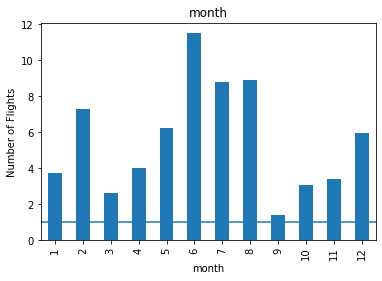

In [73]:
avgLate = np.sum(flight['N_of_flight_m'])/len(flight['N_of_flight_m'])
attributes = ['month']
for i,pred in enumerate(attributes):
    plt.figure(i, figsize=(20, 10))
    group = flight.groupby([pred], as_index=False).aggregate(np.mean)[[pred, 'totel_delay']]
    group.sort_values(by=pred, inplace=True)    
    group.plot.bar(x=pred, y='totel_delay')
    plt.axhline(y=avgLate, label='Average')
    plt.ylabel('Number of Flights')
    plt.title(pred)
    plt.legend().remove()

**June has biggest delays**

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [74]:
# Convert time to 24 hours
flight['24_hours'] = flight.dep_time.str[:2]


In [75]:
# find numbers of flight per hours
flight['N_of_flight_h'] = flight.groupby('24_hours')[['taxi_out']].count()


In [76]:
# taxi times delay changing for each hours in a day with number of the airport
taxi_cha = flight.groupby('24_hours').agg({'taxi_out': 'mean', 'origin': 'nunique'})
taxi_cha.head(3)

,taxi_out,origin
24_hours,,
01,18.666667,11
02,16.333333,8
03,13.800000,8


<Figure size 1440x720 with 0 Axes>

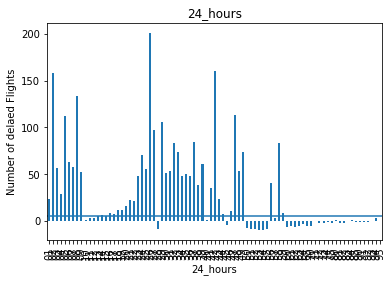

In [77]:
avgLate = np.sum(flight['totel_delay'])/len(flight['totel_delay'])
attributes = ['24_hours']
for i,pred in enumerate(attributes):
    plt.figure(i, figsize=(20, 10))
    group = flight.groupby([pred], as_index=False).aggregate(np.mean)[[pred, 'totel_delay']]
    group.sort_values(by=pred, inplace=True)    
    group.plot.bar(x=pred, y='totel_delay')
    plt.axhline(y=avgLate, label='Average')
    plt.ylabel('Number of delaed Flights')
    plt.title(pred)
    plt.legend().remove()

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [78]:
(flight['actual_elapsed_time'] - flight['crs_elapsed_time']).describe()

count    97994.000000
mean        -4.976611
std         14.380548
min      -1461.000000
25%        -13.000000
50%         -6.000000
75%          1.000000
max        230.000000
dtype: float64

#### **Task 6**: How many states cover 50% of US air traffic? 

In [79]:
flight['states'] = flight['origin_city_name'].str[-2:]
flights_per_state = flight.groupby('states')['fl_date'].count()
total_states = len(flights_per_state)
total_flights = flight.fl_date.count()
half_traffic = total_flights / 2
sorted_flight = flights_per_state.sort_values(ascending = False)
half_traffic

48997.0

In [80]:
cover = 0
indexx = 0
states_cover = []
for elm in flights_per_state.sort_values(ascending = False):
    state = flights_per_state.sort_values(ascending = False).index[indexx]
    states_cover.append(state)
    indexx += 1
    if cover <= half_traffic:
        cover += elm
    else:
        break

print(states_cover)       


['CA', 'TX', 'FL', 'IL', 'GA', 'NY', 'NC', 'CO', 'WA']


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

### Calculate the average number of delays per airport.


In [81]:
avg_delays = flight.groupby('origin')['dep_delay'].sum().mean()
print('Average Number of Delays per Airport: ' + str(avg_delays))

Average Number of Delays per Airport: 2816.6820652173915


In [82]:
flight.head(3)

,fl_date,mkt_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,totel_delay,month,day,N_of_flight_m,24_hours,N_of_flight_h,states
0,2019-12-31,AA,CLT,"Charlotte, NC",AGS,"Augusta, GA",11:0,11:0,-8.0,27.0,5.0,12:27,12:.0,-8.0,0,0,62,62.0,30.0,1,140,0.0,0.0,0.0,0.0,0.0,-8.0,12,31,NaN,11,NaN,NC
1,2019-12-31,DL,SEA,"Seattle, WA",PHX,"Phoenix, AZ",18:0,18:0,-1.0,23.0,6.0,22:44,22:.0,-2.0,0,0,165,164.0,135.0,1,1107,0.0,0.0,0.0,0.0,0.0,-2.0,12,31,7528.0,18,NaN,WA
2,2019-12-31,UA,DEN,"Denver, CO",IAD,"Washington, DC",13:0,13:0,-6.0,14.0,6.0,18:48,18:.0,-19.0,0,0,188,175.0,155.0,1,1452,0.0,0.0,0.0,0.0,0.0,-19.0,12,31,7114.0,13,NaN,CO


<Figure size 1080x360 with 0 Axes>

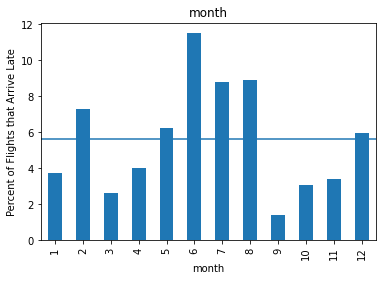

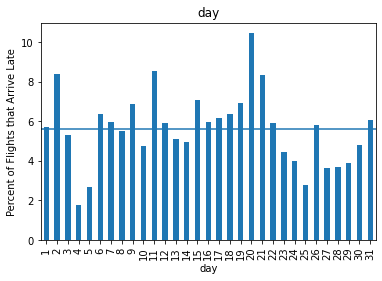

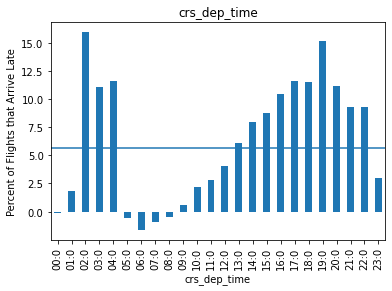

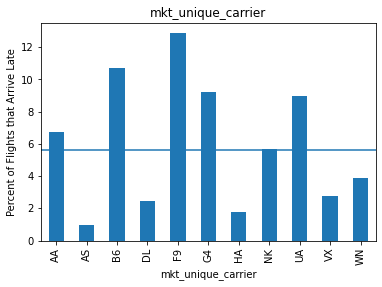

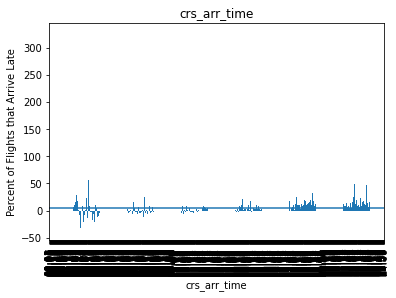

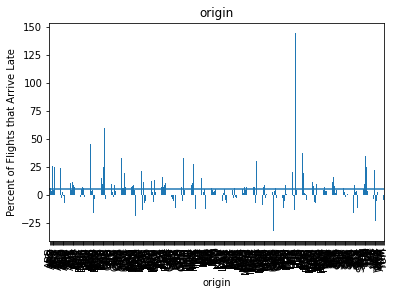

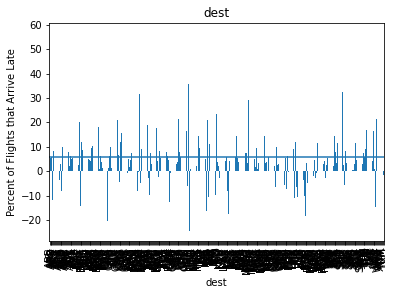

In [83]:

avgLate = np.sum(flight['totel_delay'])/len(flight['totel_delay'])
attributes = ['month','day','crs_dep_time','mkt_unique_carrier',
             'crs_arr_time','origin', 'dest']
for i,pred in enumerate(attributes):
    plt.figure(i, figsize=(15, 5))
    group = flight.groupby([pred], as_index=False).aggregate(np.mean)[[pred, 'totel_delay']]
    group.sort_values(by=pred, inplace=True)    
    group.plot.bar(x=pred, y='totel_delay')
    plt.axhline(y=avgLate, label='Average')
    plt.ylabel('Percent of Flights that Arrive Late')
    plt.title(pred)
    plt.legend().remove()
